In [1]:
import pandas as pd

# Load one week of the eVED dataset
file_path = r"C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\data\processed\final_dataset_ev.csv"

df = pd.read_csv(file_path)

# Show basic info
print("✅ Loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

# Show first few rows
df.head()


✅ Loaded successfully!
Shape: (63720, 15)

Columns:
['VehId', 'Trip', 'Timestamp', 'Lat', 'Lon', 'Speed_km_h', 'Battery_SOC', 'Battery_Voltage_V', 'Battery_Current_A', 'Temperature_C', 'Elevation_m', 'Gradient', 'Energy_Consumption_Wh', 'Acceleration_mps2', 'Distance_m']


,VehId,Trip,Timestamp,Lat,Lon,Speed_km_h,Battery_SOC,Battery_Voltage_V,Battery_Current_A,Temperature_C,Elevation_m,Gradient,Energy_Consumption_Wh,Acceleration_mps2,Distance_m
0,11.0,3875.0,1970-01-01 00:00:00.000,42.297784,-83.720559,34.959999,57.974678,307.0,-83.650024,5.75,272.551605,0.000000,0.007133,0.000000,0.00000
1,11.0,3875.0,1970-01-01 00:00:01.000,42.297784,-83.720559,38.840000,57.974678,307.0,-132.650024,5.75,272.551605,0.000000,0.011312,1.077778,0.00000
2,11.0,3875.0,1970-01-01 00:00:02.100,42.297784,-83.720559,42.639999,57.974678,307.0,-116.350037,5.75,272.843756,0.004454,0.009922,1.055555,0.00000
3,11.0,3875.0,1970-01-01 00:00:03.000,42.297819,-83.720164,42.639999,57.974678,307.0,-116.350037,5.75,272.989832,0.000000,0.009922,0.000000,32.79337
4,11.0,3875.0,1970-01-01 00:00:03.100,42.297819,-83.720164,45.789997,57.974678,307.0,-96.049988,5.75,273.135907,0.000000,0.008191,0.874999,0.00000


✅ Cleaned dataset loaded successfully!
⚙️ Random Forest Performance:
R² Score: 0.9756
Mean Absolute Error (MAE): 2.7185
Root Mean Squared Error (RMSE): 5.5116


C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3889218569.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3889218569.py:70: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


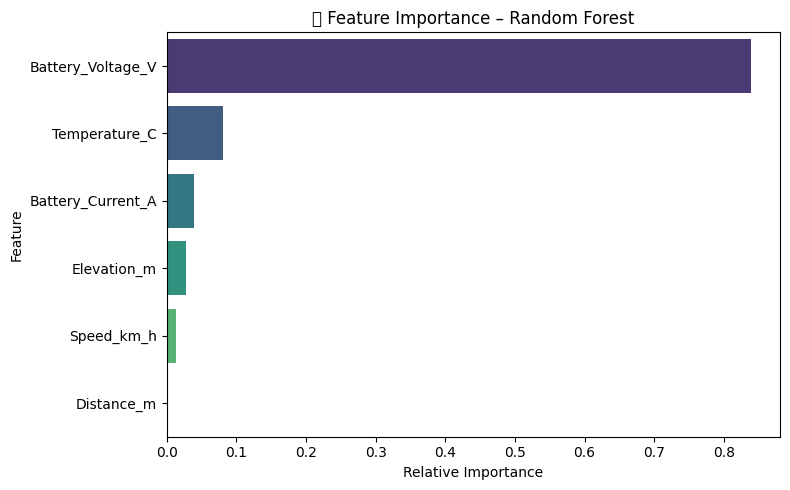

In [2]:
# ------------------------------
# 0️⃣ Import libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ------------------------------
# 1️⃣ Load cleaned dataset
# ------------------------------
processed_path = r"C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\data\processed\final_dataset_ev.csv"
df = pd.read_csv(processed_path)
print("✅ Cleaned dataset loaded successfully!")

# ------------------------------
# 2️⃣ Prepare features and target
# ------------------------------
X = df[['Speed_km_h', 'Elevation_m', 'Distance_m', 'Temperature_C',
        'Battery_Voltage_V', 'Battery_Current_A']]
y = df['Battery_SOC']

# ------------------------------
# 3️⃣ Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 4️⃣ Train Random Forest
# ------------------------------
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# ------------------------------
# 5️⃣ Predictions & metrics
# ------------------------------
y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("⚙️ Random Forest Performance:")
print(f"R² Score: {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

# ------------------------------
# 6️⃣ Feature Importance
# ------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('🔍 Feature Importance – Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


✅ Cleaned dataset loaded successfully!

📊 Model Comparison:
               Model        R2        MAE       RMSE
0  Linear Regression  0.515688  19.305894  24.567614
1      Random Forest  0.975624   2.718517   5.511602


C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3808379915.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3808379915.py:77: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


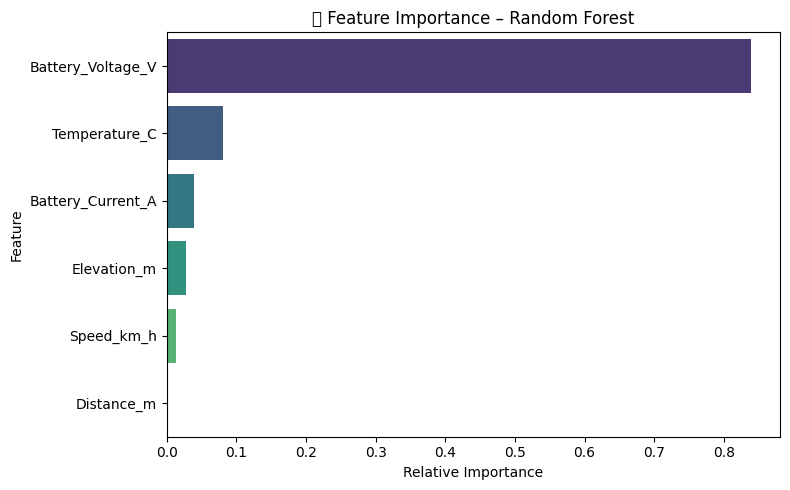

C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3808379915.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2', data=metrics, palette='Set2')
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3808379915.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=metrics, palette='Set2')
C:\Users\Zeeshan\AppData\Local\Temp\ipykernel_21804\3808379915.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=metrics, palette='Set2')


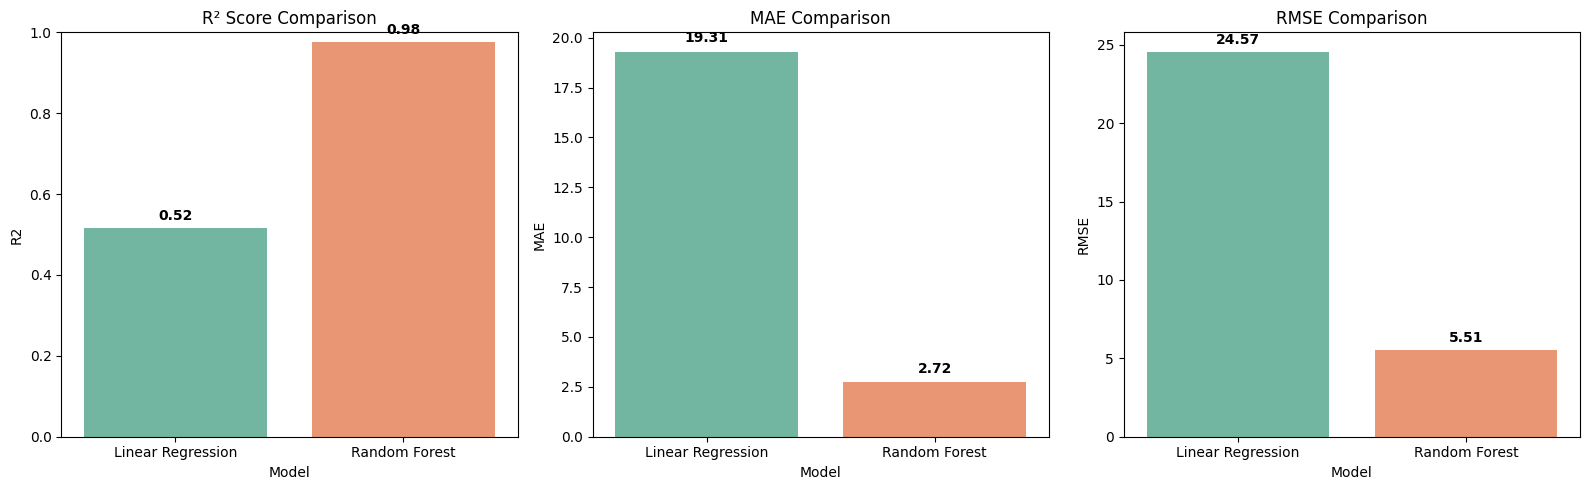

In [4]:
# ------------------------------
# 0️⃣ Import libraries
# ------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1️⃣ Load cleaned dataset
# ------------------------------
processed_path = r"C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\data\processed\final_dataset_ev.csv"
df = pd.read_csv(processed_path)
print("✅ Cleaned dataset loaded successfully!")

# ------------------------------
# 2️⃣ Prepare features and target
# ------------------------------
X = df[['Speed_km_h', 'Elevation_m', 'Distance_m', 'Temperature_C',
        'Battery_Voltage_V', 'Battery_Current_A']]
y = df['Battery_SOC']

# ------------------------------
# 3️⃣ Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 4️⃣ Train Random Forest
# ------------------------------
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ------------------------------
# 5️⃣ Train Linear Regression
# ------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ------------------------------
# 6️⃣ Compute metrics
# ------------------------------
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    'MAE': [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})

print("\n📊 Model Comparison:")
print(metrics)

# ------------------------------
# 7️⃣ Feature Importance (Random Forest)
# ------------------------------
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=importances, x='Importance', y='Feature', palette='viridis')
plt.title('🔍 Feature Importance – Random Forest')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# ------------------------------
# 8️⃣ Visual comparison of models
# ------------------------------
plt.figure(figsize=(16,5))

# R²
plt.subplot(1,3,1)
sns.barplot(x='Model', y='R2', data=metrics, palette='Set2')
plt.title('R² Score Comparison')
plt.ylim(0,1)
for i, v in enumerate(metrics['R2']):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center', fontweight='bold')

# MAE
plt.subplot(1,3,2)
sns.barplot(x='Model', y='MAE', data=metrics, palette='Set2')
plt.title('MAE Comparison')
for i, v in enumerate(metrics['MAE']):
    plt.text(i, v+0.5, f"{v:.2f}", ha='center', fontweight='bold')

# RMSE
plt.subplot(1,3,3)
sns.barplot(x='Model', y='RMSE', data=metrics, palette='Set2')
plt.title('RMSE Comparison')
for i, v in enumerate(metrics['RMSE']):
    plt.text(i, v+0.5, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


✅ Cleaned dataset loaded successfully!
✅ Random Forest model trained successfully!

⚙️ Random Forest Performance:
R² Score: 0.9756
Mean Absolute Error (MAE): 2.7185
Root Mean Squared Error (RMSE): 5.5116


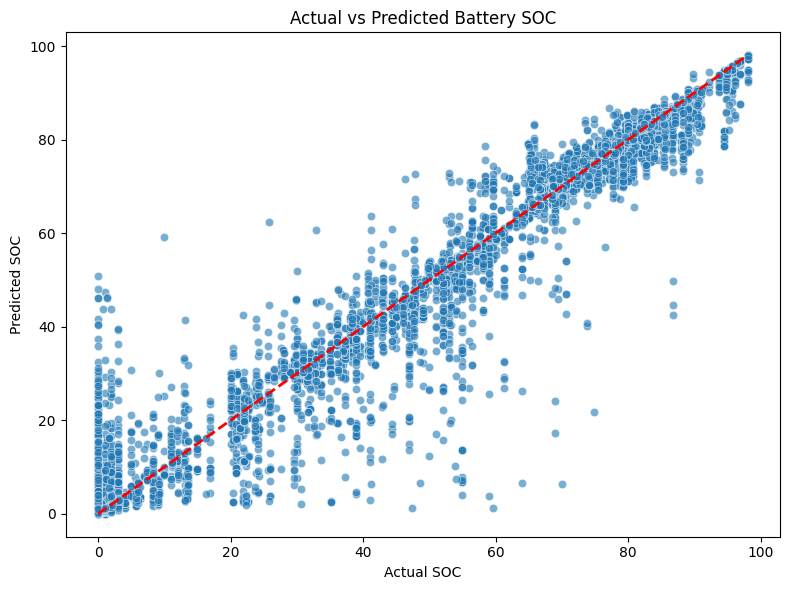

✅ Model saved successfully at: C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\Model\random_forest_model.pkl


In [7]:
# ------------------------------
# 0️⃣ Import libraries
# ------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import os
from joblib import dump

# ------------------------------
# 1️⃣ Load cleaned dataset
# ------------------------------
processed_path = r"C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\data\processed\final_dataset_ev.csv"
df = pd.read_csv(processed_path)
print("✅ Cleaned dataset loaded successfully!")

# ------------------------------
# 2️⃣ Prepare features and target
# ------------------------------
X = df[['Speed_km_h', 'Elevation_m', 'Distance_m', 'Temperature_C',
        'Battery_Voltage_V', 'Battery_Current_A']]
y = df['Battery_SOC']

# ------------------------------
# 3️⃣ Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# 4️⃣ Train Random Forest
# ------------------------------
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
print("✅ Random Forest model trained successfully!")

# ------------------------------
# 5️⃣ Predictions & metrics
# ------------------------------
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5


print("\n⚙️ Random Forest Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# ------------------------------
# 6️⃣ Actual vs Predicted plot
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual SOC")
plt.ylabel("Predicted SOC")
plt.title("Actual vs Predicted Battery SOC")
plt.tight_layout()
plt.show()

# ------------------------------
# 7️⃣ Save model
# ------------------------------
save_dir = r"C:\Users\Zeeshan\Downloads\Ev_route_Optimization_ml\Model"
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, "random_forest_model.pkl")
dump(rf, model_path)

print(f"✅ Model saved successfully at: {model_path}")
